In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("StudentsPerformance.csv")

In [ ]:
df.loc[df.gender == 'female']

In [ ]:
df.loc[df['writing score'] >= df['writing score'].mean()]

In [ ]:
# 1.5.4
df.loc[(df['writing score'] >= df['writing score'].mean()) & (df.gender == 'female')]

In [ ]:
# 1.5.6
(df.groupby('lunch').count()/ df.shape[0]).iloc[0,0]

In [ ]:
# 1.5.7
# df.loc[df.lunch == "standard"].describe() - df.loc[df.lunch == "free/reduced"].describe() # alternative option
df.groupby('lunch').aggregate({'math score':['mean', 'var'], 'reading score':['mean', 'var'], 'writing score':['mean', 'var']})


In [ ]:
# 1.5.12
selected_columns = df.filter(like='-')

In [ ]:
# 1.6.5
ddf = pd.read_csv("dota_hero_stats.csv")
#ddf.groupby('legs').count()
ddf['legs'].value_counts()

In [ ]:
# 1.6.6
adf = pd.read_csv('accountancy.csv')
# adf.pivot_table(values = "Salary", index = "Executor", columns = "Type") # alternative solution
adf.groupby(['Type', 'Executor'])\
    .aggregate(mean_sal = ('Salary', 'mean'))\
    .unstack()

In [ ]:
# 1.6.7
ddf = pd.read_csv("dota_hero_stats.csv")
# ddf.filter(items=['attack_type','primary_attr']).mode() # alternative solution
ddf.groupby(['attack_type', 'primary_attr']).count().sort_values('id', ascending=False).head(1)

In [ ]:
# 1.6.8
concentrations = pd.read_csv('algae.csv')
# mean_concentrations = concentrations.groupby(['genus']).aggregate('mean')

In [ ]:
# 1.6.9
concentrations.loc[concentrations.genus == "Fucus", 'alanin'].aggregate(['min', 'mean', 'max']).round(2)

In [ ]:
# 1.6.10
agg1 = concentrations.groupby('group', as_index=False).agg({'sucrose':['min', 'max']}).round(2)
print(agg1.sucrose['max'] - agg1.sucrose['min'])
print(concentrations.groupby('group', as_index=False).agg(cnt = ('group', 'count')))
print(concentrations.groupby('group', as_index=False).agg(var = ('citrate', 'var')))

<Axes: >

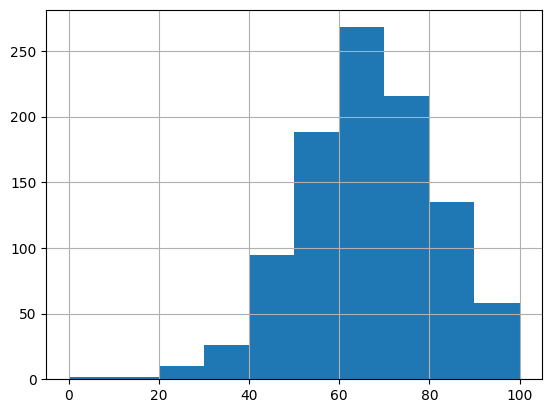

In [4]:
# 1.7.3
df['math score'].hist()

<Axes: xlabel='math score', ylabel='reading score'>

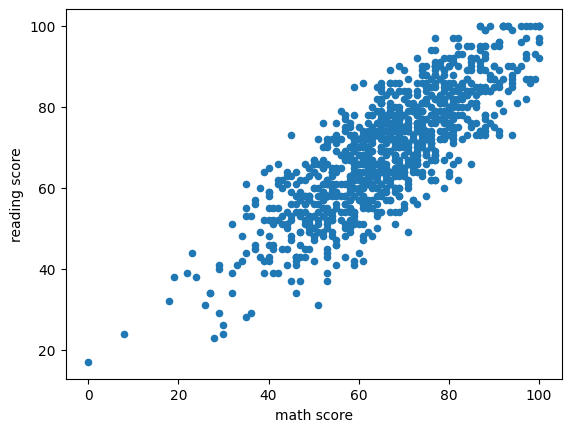

In [10]:
# 1.7.4
df.plot.scatter(x='math score', y='reading score')

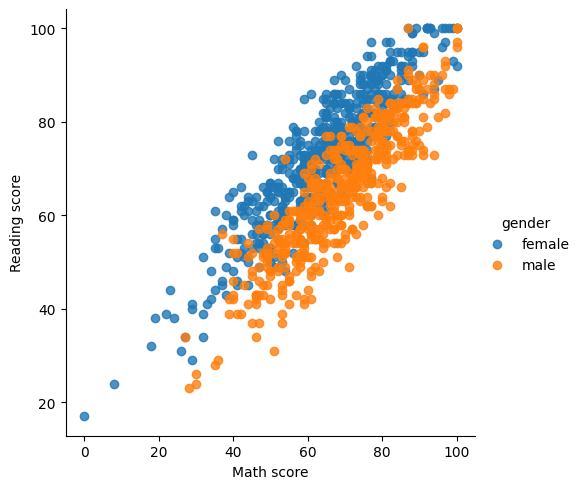

In [12]:
ax = sns.lmplot(x='math score', y='reading score', hue='gender', data=df, fit_reg=False)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

In [13]:
# 1.7.5
idf = pd.read_csv('income.csv')
# idf.income.plot()
# sns.lineplot(data=idf)
# idf.plot()
# idf['income'].plot()
# plt.plot(idf.index, idf.income)
# idf.plot(kind='line')
# sns.lineplot(x=idf.index, y=idf.income)

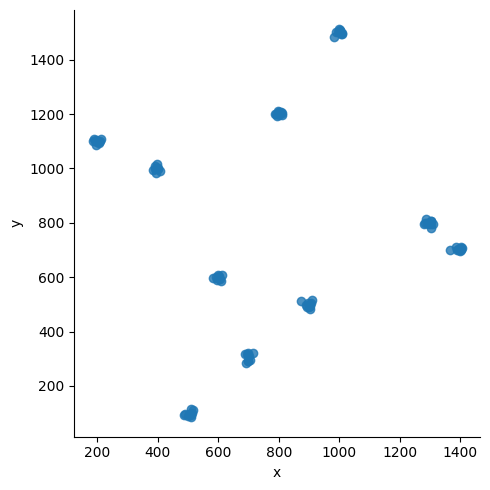

In [24]:
# 1.7.6
ndf = pd.read_csv("dataset_209770_6.txt", sep=" ")
sns.lmplot(x='x', y='y', data=ndf, fit_reg=False)
# 10

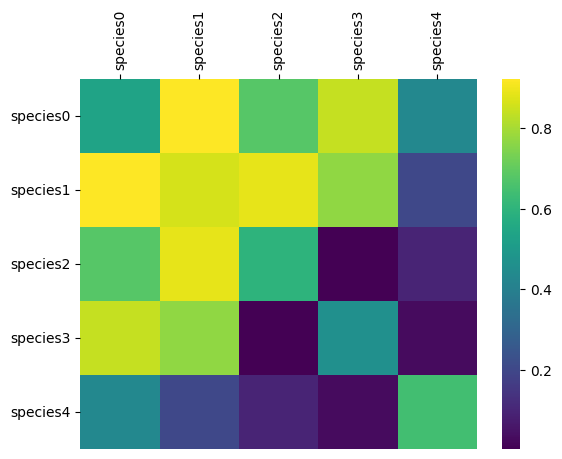

In [42]:
# 1.7.7
gdf = pd.read_csv("genome_matrix.csv", index_col=0)
g = sns.heatmap(data=gdf, cmap="viridis") 
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)
g.yaxis.set_tick_params(rotation=0)

<Axes: xlabel='nroles', ylabel='Count'>

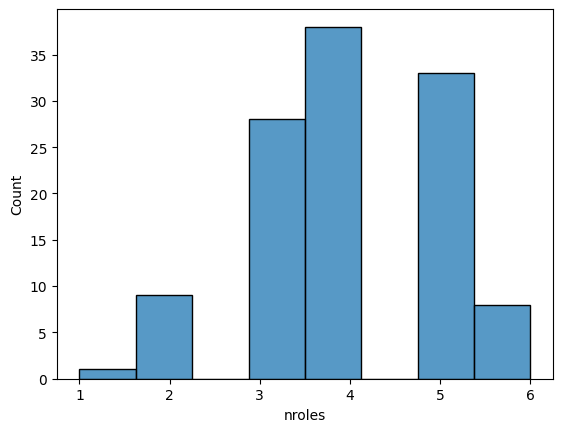

In [64]:
# 1.7.8
ddf = pd.read_csv("dota_hero_stats.csv", index_col=0)
# roles column is split on "," and converted to a list
ddf['nroles'] = [len(list(c.split(","))) for c in ddf['roles']]
sns.histplot(data=ddf, x='nroles')

In [4]:
# 1.7.9
idf = pd.read_csv("iris.csv", index_col=0)
for column in idf:
    # sns.kdeplot(idf[f"{column}"]) # kernel density on one graph
    sns.displot(idf[f"{column}"])
sns.pairplot(idf,  vars=idf.columns[:-1], diag_kind='kde')
# colors = ['g', 'r', 'blue', 'yellow', 'white']
# for col, color in zip(idf.iloc[:, :-1], colors):
#     sns.distplot(idf[col], kde_kws = {'color':color, 'lw':1, 'label':col})

<Axes: ylabel='petal length'>

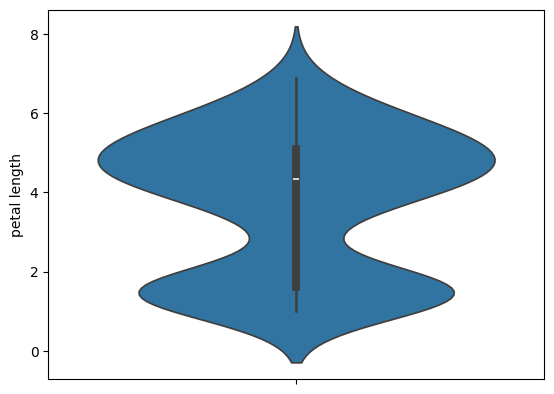

In [30]:
# 1.7.10
sns.violinplot(data=idf["petal length"])

In [45]:
idf.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

<Axes: >

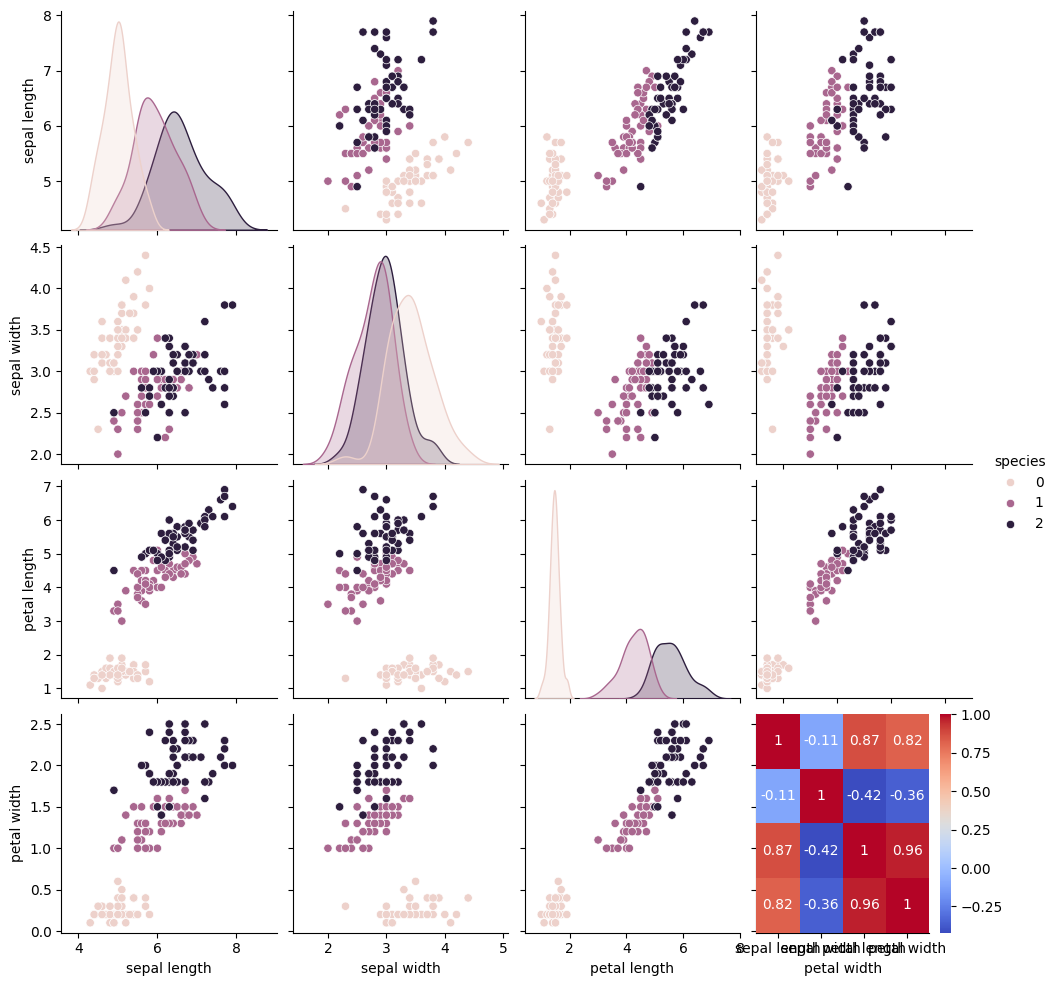

In [50]:
# 1.7.11
sns.pairplot(idf, hue='species')
idf.corr()
#sns.heatmap(idf.drop('species', axis=1).corr(), annot=True, cmap= 'coolwarm')

In [23]:
# 1.8.2
my_data = pd.DataFrame(data={'type': ['A', 'A', 'B', 'B'], 'value': [10, 14, 12, 23]})


In [25]:
# 1.8.3
my_stat = pd.read_csv('my_stat.csv')
subset_1 = my_stat.iloc[:10, [0, 2]]
subset_2 = my_stat.drop([0, 4]).iloc[:, [1, 3]]

In [13]:
# 1.8.4
subset_1 = my_stat[(my_stat.V1 > 0) & (my_stat.V3 == 'A')]
subset_2 = my_stat[(my_stat.V2 != 10) | (my_stat.V4 >= 1)]


In [16]:
# 1.8.5
my_stat['V5'] = my_stat.V1 + my_stat.V4
my_stat['V6'] = np.log(my_stat['V2'])


In [30]:
# 1.8.6
my_stat.rename(columns={'V1': "session_value", 'V2': 'group', 'V3': 'time', 'V4': 'n_users'}, inplace=True)


In [51]:
# 1.8.7
my_stat = pd.read_csv('my_stat_1.csv')
my_stat.loc[my_stat['session_value'].isnull(), 'session_value'] = 0
non_neg_median = my_stat.loc[my_stat['n_users'] >= 0, 'n_users'].median()
my_stat.loc[my_stat['n_users'] < 0, 'n_users'] = non_neg_median


In [55]:
# 1.8.8
mean_session_value_data = my_stat.groupby('group', as_index=False) \
    .agg({'session_value': 'mean'}) \
    .rename(columns={'session_value': 'mean_session_value'})